In [1]:
import numpy as np
from scipy.stats import expon, norm
import matplotlib.pyplot as plt

## 1. Law of Large Numbers

**sample mean** will converge to **population mean** as **$n \rightarrow \infty$**

**$\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n} \rightarrow \mu $**, where $X_1, X_2, ... X_n$ are iid

### Example: 
sample mean of exponential rv with converge to population mean

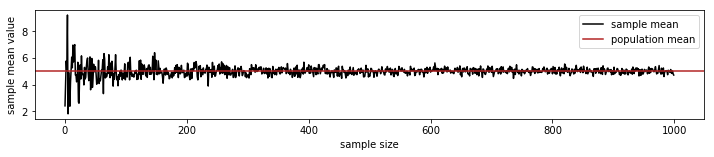

In [2]:
# validation LLN
pop_mean = 5
sample_means =[np.mean(expon.rvs(loc=0, scale = pop_mean, size = n+1)) for n in range(1000)]

# visualization
fig =plt.figure(figsize=(12,2))
ax = fig.add_subplot(1,1,1)
ax.plot(sample_means, color = "black", label = "sample mean")
ax.axhline(pop_mean, color = "firebrick", label = "population mean")
ax.set_xlabel('sample size'), ax.set_ylabel('sample mean value')
ax.legend()
plt.show()

## 2. Central Limit Theorem

- **sample mean $\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}$** is a rv,  $n\rightarrow\infty$
- **$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$**
- if we don't know $\sigma^2$, we could use sample variance  $S^2 =  \frac{1}{n-1} \sum_{k=1}^{n}(X_k - \bar{X})^2$ instead
- population distribution could be **ANY** distribution

### Example:
sample mean of Exponential distribution is Gaussian

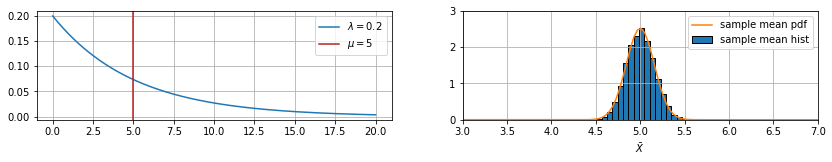

In [22]:
# validation CLT
pop_mean = 5
sample_size = 1000
sample_means =[np.mean(expon.rvs(loc=0, scale = pop_mean, size = sample_size)) for i in range(10000)]

# visualization
x = np.linspace(0,20,500)
fig =plt.figure(figsize=(14,2))
ax_exp = fig.add_subplot(1,2,1)
ax_exp.plot(x, expon.pdf(x,scale=pop_mean), label="$\lambda = 0.2$")
ax_exp.axvline(pop_mean, color = "firebrick", label = "$\mu = 5$")
ax_exp.legend(), ax_exp.grid()
ax = fig.add_subplot(1,2,2)
ax.hist(sample_means, bins=20, normed=True,edgecolor="black", label = "sample mean hist")
ax.plot(x, norm.pdf(x, loc=pop_mean, scale=((pop_mean)**2/sample_size)**0.5), label = "sample mean pdf")
ax.set_xlabel(r'$\bar{X}$')
ax.set_xlim(3,7), ax.set_ylim(0,3)
ax.legend(), ax.grid()
plt.show()

since **$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$**, when $n \rightarrow \infty, \frac{\sigma^2}{n} \rightarrow 0$ 

<img style="float: left;" src="figures/clt.gif">

## 3. Limitation of CLT

- when **population distribution** is **normal**, but $\sigma^2$ need to be estimated, $\bar{X}$ follow **t-distribution**
- when **population distribution** is **normal**, and given $\sigma^2$, sample size not a problem
- when sample size is not **large enough**, $\bar{X}$ may not follow normal distribution

## 4. Statistical Model

#### Definition: 
    a set of distributions(or density) 

### 4.1 Parametric Model:
#### Definition:
   the statistical model could be parameterized by finite parameters $[\theta_1, \theta_2, ..., \theta_n]$
    
#### Example:
   estimate $\mu$ from data, but assuming the population distribution is $\mathcal{N}(\mu, \sigma^2)$ 

### 4.2 Nonparametric Model:

#### Definition:
the statistical model that can not be parameterized by a finite parameters.

#### Example:
estimate $\mu$ from data, but only assuming $\mu < \infty$

## 5 Empirical Distribution Function

- nonparametric estimation
- $\hat{F}(x) = \frac{\text{count}(X_i < x)}{n}$, we assume each $X_i$ has probability $\frac{1}{n}$
- $\hat{F}(x) \rightarrow F(x)$ when $n \rightarrow \infty$

#### Examples: estimate a gaussian cdf

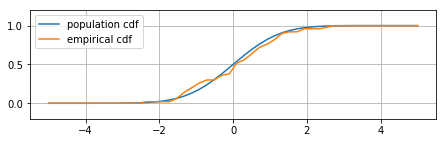

In [444]:
# empirical distribution
def emp_cdf(n_samples, rvs):
    return [sum(rvs < i)/n_samples for i in x]

n_samples = 50
x = np.linspace(-5, 5, n_samples)
rvs = norm.rvs(size = n_samples)

est_cdf = emp_cdf(n_samples, rvs)

# visualization
pop_cdf = norm.cdf(x)
fig = plt.figure(figsize = (16, 2))
ax = fig.add_subplot(1,2,1)
ax.plot(x, pop_cdf, label="population cdf")
ax.plot(x, est_cdf, label="empirical cdf")
ax.legend(), ax.set_ylim(-0.2,1.2), ax.grid()
plt.show()

## 6 Bootstrap

- nonparametric
- estimate stadard errors of a statistic $T = h(X_1, X_2, ..., X_n)$
    - e.g: $Var(\text{estimated median})$
    - since it's hard to write down a simple formula for the variance of a statistic

### 6.1 Basic Idea
e.g: on median    
- > $\begin{align}
    \text{real world($F$)}
    &\Longrightarrow \text{       }
    X_1,X_2,...X_n
    \text{        }
    \Longrightarrow \text{Median} \\
    \text{bootstrap world($\hat{F}$)}
    &\Longrightarrow \text{       }
    X_1^*,X_2^*,...X_m^*
    \text{        }
    \Longrightarrow \text{Estimated Median} \Longrightarrow \text{Estimate Std}
\end{align}$

### 6.2 Steps

> 1. simulate $X_i^*$ by drawing from ${X_1, X_2, ..., X_n}$ <span style="color:red">with replacement </span>
2. compute median($M^*$) on ${X_1^*, X_2^*, ... , X_m^*}$
3. repeat step 1, step 2, $B$ times, to get $M_{1}^*, M_{2}^*, ... , M_{B}^*$
4. $Var_{\text{bootstrap}} = \frac{1}{B}\sum_{b=1}^{B}(M_b^* - \bar{M}^*)^2$, where $\bar{M}^* = \frac{1}{B}\sum_{b=1}^{B}M_b^*$

#### Coding Simulation

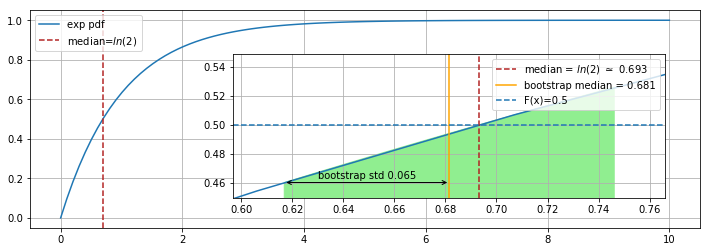

In [433]:
# bootstrap estimate median and its variance
n, m, b = 3000, 200, 50
data = expon.rvs(size=n)
boot_data = np.array([np.median(np.random.choice(data, size=m)) for i in range(b)])
boot_median = boot_data.mean()
boot_std = boot_data.std()

# visualization
x = np.linspace(0,10,100)
x_boot = np.linspace(boot_median-boot_std,boot_median+boot_std,100)
fig = plt.figure(figsize=(12,4))
ax_pdf = fig.add_subplot(1,1,1)
ax_pdf.plot(x, expon.cdf(x), label="exp pdf")
ax_pdf.axvline(np.log(2), ls="--",
               label="median=$ln(2)$", color="firebrick")
ax_pdf.legend(loc=2), ax_pdf.grid()
ax_detail = fig.add_axes([.36,.23,.5,0.5])
ax_detail.plot(x,expon.cdf(x))
ax_detail.axvline(np.log(2), ls="--",
                  color="firebrick",label="median = $ln(2)$ $\simeq$ {0:.3f}".format(np.log(2)))
ax_detail.axvline(boot_median, color="orange",
                  label = "bootstrap median = {0:.3f}".format(boot_median))
ax_detail.axhline(0.5, ls="--",label="F(x)=0.5")
ax_detail.fill_between(x_boot, np.zeros(100),
                       expon.cdf(x_boot), color="lightgreen") 
ax_detail.annotate('', xy=(x_boot[0],expon.cdf(x_boot[0])), xycoords='data',
                  xytext=(x_boot[0]+boot_std, expon.cdf(x_boot[0])), textcoords='data',
                  arrowprops=dict(arrowstyle="<->"))
ax_detail.text(x_boot[0]+boot_std/2, expon.cdf(x_boot[0])+0.005,
               'bootstrap std {0:.3f}'.format(boot_std),verticalalignment='center',horizontalalignment='center')
ax_detail.set_xlim(x_boot[0]-0.02,x_boot[-1]+0.02), ax_detail.set_ylim(0.45,0.549), ax_detail.grid() 
ax_detail.legend(loc=1)
plt.show()

## 7 Jackknife

- nonparametric
- similar to Bootstrap, it can be used to estimate standard errors of statistics

### 7.1 Ideas

e.g: on median    
- > $\begin{align}
    \text{real world($F$)}
    &\Longrightarrow \text{       }
    X_1,X_2,...X_n
    \text{        }
    \Longrightarrow \text{Median} \\
    \text{jackknife world($\hat{F}$)}
    &\Longrightarrow \text{       }
    \mathbf{X_{[1]}},\mathbf{X_{[2]}},...\mathbf{X_{[n]}}
    \text{        }
    \Longrightarrow \text{Estimated Median} \Longrightarrow \text{Estimate Std}
\end{align}$

### 7.2 Steps

> 1. generate jackknife sample vector by leaving one out
    - $\mathbf{X_{[i]}} = [X_1, X_2, ..., X_{i-1}, X_{i+1}, ..., X_{n}]$
2. compute jackknife median vector($M_1^*, M_2^*, ..., M_n^*$) on $\mathbf{X_{[1]}},\mathbf{X_{[2]}}, ... ,\mathbf{X_{[n]}}$
3. $Var_{\text{jack}} = \frac{n-1}{n}\sum_{i=1}^{n}(M_i^* - \bar{M}^*)^2$, where $\bar{M}^* = \frac{1}{n}\sum_{i=1}^{n}M_i^*$

#### coding simulation

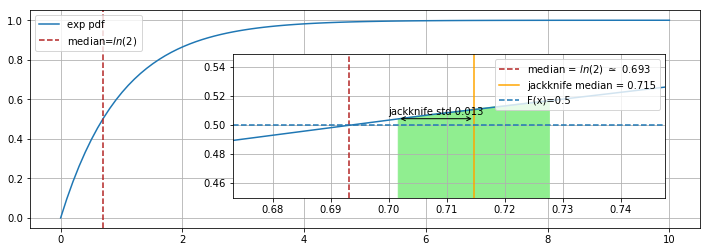

In [443]:
# jackknife estimate median and its variance
n = 3000
data = expon.rvs(size=n)
jack_data = np.array([np.median(np.delete(data, i)) for i in range(n)])
jack_median = jack_data.mean()
jack_std = np.power( (n-1)/n * sum(np.power(jack_data - jack_median, 2)), 0.5)

# visualization
x = np.linspace(0,10,100)
x_jack = np.linspace(jack_median-jack_std,jack_median+jack_std,100)
fig = plt.figure(figsize=(12,4))
ax_pdf = fig.add_subplot(1,1,1)
ax_pdf.plot(x, expon.cdf(x), label="exp pdf")
ax_pdf.axvline(np.log(2), ls="--",
               label="median=$ln(2)$", color="firebrick")
ax_pdf.legend(loc=2), ax_pdf.grid()
ax_detail = fig.add_axes([.36,.23,.5,0.5])
ax_detail.plot(x,expon.cdf(x))
ax_detail.axvline(np.log(2), ls="--",
                  color="firebrick",label="median = $ln(2)$ $\simeq$ {0:.3f}".format(np.log(2)))
ax_detail.axvline(jack_median, color="orange",
                  label = "jackknife median = {0:.3f}".format(jack_median))
ax_detail.axhline(0.5, ls="--",label="F(x)=0.5")
ax_detail.fill_between(x_jack, np.zeros(100),
                       expon.cdf(x_jack), color="lightgreen") 
ax_detail.annotate('', xy=(x_jack[0],expon.cdf(x_jack[0])), xycoords='data',
                  xytext=(x_jack[0]+jack_std, expon.cdf(x_jack[0])), textcoords='data',
                  arrowprops=dict(arrowstyle="<->"))
ax_detail.text(x_jack[0]+jack_std/2, expon.cdf(x_jack[0])+0.005,
               'jackknife std {0:.3f}'.format(jack_std),verticalalignment='center',horizontalalignment='center')
ax_detail.set_xlim(min(x_jack[0]-0.02, np.log(2)-0.02),
                   max(x_jack[-1]+0.02, np.log(2)+0.02))
ax_detail.set_ylim(min(0.45, expon.cdf(x_jack[0]-0.01)),
                   max(0.549, expon.cdf(x_jack[-1]+0.01))), ax_detail.grid() 
ax_detail.legend()
plt.show()